In [1]:
# Remember to update your path
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('C:/Linux_home/Qishi/QishiQR')

from pathlib import Path

from Backtesting.Vectorized.cross_compare import *
from Backtesting.Vectorized.models import *

from Utils.lm import gen_strategy, LM_model
from Utils.MajorContract_split import MajorContracts

import json
import warnings
warnings.filterwarnings(action='ignore')

# ====== Initial Configuration ========

try:
    with open('config.json','r') as f:
        config = json.load(f)
except:
    print("Failed to find the configuration file.")
        
DATA_DIR = config['Tick path']
OUTPUT_DIR = config['Output path']
Strategy_DIR = config['Strategy path']
Major_DIR = config['Major path']
model_order = config['Max model order']
number_of_states = config['State number']
freq = config['Frequency']
offset = config['Offset']
tca = None

# Bu test

## Build time series of Major contracts without thresholding the price movements

In [2]:
bu_mj = MajorContracts(symbol='bu', split_time='2016-7-1', topdir='C:/Linux_home/Qishi/tick2016', 
                       maturity={'1606':['2015-11-1','2016-5-1'], 
                                 '1609':['2016-2-1','2016-8-1'], 
                                 '1612':['2016-6-1','2016-11-15'],
                                 '1706':['2016-10-15','2017-1-31']}, 
                       transitions={'1606':'2016-3-1', '1609':'2016-7-1', '1612':'2016-11-1', '1706':'2017-1-1' },
                       freq=freq, offset=offset)
df_bu_train, df_bu_test, ptb = bu_mj.create_major_overlap()

strategy = list(ptb.values())
slm = pd.concat(strategy).groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)

bu1606 C:/Linux_home/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 C:/Linux_home/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 C:/Linux_home/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 C:/Linux_home/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


## price change distribution

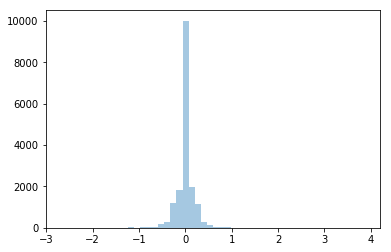

In [3]:
import seaborn as sns
bu_pct_change_train = df_bu_train.LastPrice.pct_change().dropna().values*100
sns.distplot(bu_pct_change_train, kde=False)

Calcualte the standard deviation of price change:

In [4]:
np.std(bu_pct_change_train)

0.19344239679843186

## Build time series of Major contracts with thresholding the price movements
### 0.05% threshold
Since the std of the price change is ~ 0.2%, we choose to use 0.1% as the threshold of price movements.

In [5]:
bu_mj_th = MajorContracts(symbol='bu', split_time='2016-7-1', topdir='C:/Linux_home/Qishi/tick2016', 
                       maturity={'1606':['2015-11-1','2016-5-1'], 
                                 '1609':['2016-2-1','2016-8-1'], 
                                 '1612':['2016-6-1','2016-11-15'],
                                 '1706':['2016-10-15','2017-1-31']}, 
                       transitions={'1606':'2016-3-1', '1609':'2016-7-1', '1612':'2016-11-1', '1706':'2017-1-1' },
                       freq=freq, offset=offset, px_th=0.05/100)
df_bu_train_th_0, df_bu_test_th_0, ptb_th_0 = bu_mj_th.create_major_overlap()

strategy = list(ptb_th_0.values())
slm_th_0 = pd.concat(strategy).groupby(['prior']).sum().reset_index()
slm_th_0['signal'] = slm_th_0.loc[:, '0':'2'].idxmax(axis=1)

bu1606 C:/Linux_home/Qishi/tick2016/bu
0.0005
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 C:/Linux_home/Qishi/tick2016/bu
0.0005
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 C:/Linux_home/Qishi/tick2016/bu
0.0005
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 C:/Linux_home/Qishi/tick2016/bu
0.0005
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


### 0.1% threshold


In [6]:
bu_mj_th = MajorContracts(symbol='bu', split_time='2016-7-1', topdir='C:/Linux_home/Qishi/tick2016', 
                       maturity={'1606':['2015-11-1','2016-5-1'], 
                                 '1609':['2016-2-1','2016-8-1'], 
                                 '1612':['2016-6-1','2016-11-15'],
                                 '1706':['2016-10-15','2017-1-31']}, 
                       transitions={'1606':'2016-3-1', '1609':'2016-7-1', '1612':'2016-11-1', '1706':'2017-1-1' },
                       freq=freq, offset=offset, px_th=0.1/100)
df_bu_train_th, df_bu_test_th, ptb_th = bu_mj_th.create_major_overlap()

strategy = list(ptb_th.values())
slm_th = pd.concat(strategy).groupby(['prior']).sum().reset_index()
slm_th['signal'] = slm_th.loc[:, '0':'2'].idxmax(axis=1)

bu1606 C:/Linux_home/Qishi/tick2016/bu
0.001
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 C:/Linux_home/Qishi/tick2016/bu
0.001
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 C:/Linux_home/Qishi/tick2016/bu
0.001
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 C:/Linux_home/Qishi/tick2016/bu
0.001
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


### 0.2% threhold 

In [7]:
bu_mj_th_2 = MajorContracts(symbol='bu', split_time='2016-7-1', topdir='C:/Linux_home/Qishi/tick2016', 
                       maturity={'1606':['2015-11-1','2016-5-1'], 
                                 '1609':['2016-2-1','2016-8-1'], 
                                 '1612':['2016-6-1','2016-11-15'],
                                 '1706':['2016-10-15','2017-1-31']}, 
                       transitions={'1606':'2016-3-1', '1609':'2016-7-1', '1612':'2016-11-1', '1706':'2017-1-1' },
                       freq=freq, offset=offset, px_th=0.2/100)

In [8]:
df_bu_train_th_2, df_bu_test_th_2, ptb_th_2 = bu_mj_th_2.create_major_overlap()

strategy = list(ptb_th_2.values())
slm_th_2 = pd.concat(strategy).groupby(['prior']).sum().reset_index()
slm_th_2['signal'] = slm_th_2.loc[:, '0':'2'].idxmax(axis=1)

bu1606 C:/Linux_home/Qishi/tick2016/bu
0.002
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 C:/Linux_home/Qishi/tick2016/bu
0.002
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 C:/Linux_home/Qishi/tick2016/bu
0.002
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 C:/Linux_home/Qishi/tick2016/bu
0.002
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


# Compare two generated probability tables

## TBD
------


# test on bu1612
## No threshold

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.303799,0.003282,-0.003680,0.002200,0.000080,-0.040180,0.026412,-0.096736,0.597665,2.701154,2430,1.193664,0.383951
1,0.299094,0.003155,-0.003986,0.002154,0.000104,-0.037608,0.026412,-0.119880,0.540345,2.636944,1789,1.186132,0.570710
2,0.308003,0.003882,-0.004025,0.002165,0.000139,-0.037608,0.026412,-0.103228,0.537917,3.150814,1643,1.229029,0.632380
3,0.320843,0.003522,-0.004218,0.002222,0.000120,-0.037608,0.026412,-0.128472,0.526818,2.744516,1728,1.207812,0.545139
4,0.354156,0.001580,-0.003497,0.002453,0.000047,-0.047068,0.026412,-0.126464,0.701540,1.115659,1967,1.093248,0.417895
5,0.362576,0.004264,-0.003160,0.002668,0.000115,-0.023376,0.026763,-0.114588,0.844399,2.939895,2183,1.251561,0.363262
6,0.389748,0.003866,-0.002846,0.002708,0.000097,-0.024286,0.046855,-0.103596,0.951651,2.479652,2359,1.228080,0.305638


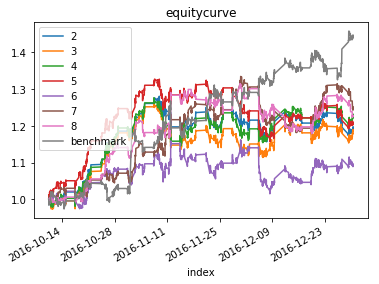

In [9]:
from Backtesting.Vectorized.models import OneContractTest

start = '20161001'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test1 = MajorSeriesTest(df_bu_test, OUTPUT_DIR,slm)
test1.build( max_order, offset, start, end, tcas)

test1.run()

test1.plot()
test1.results[0]['benchmark'].plot()
plt.legend()
test1.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.262314,0.006478,-0.003198,0.002000,0.000154,-0.040180,0.026412,-0.065766,0.625451,6.173434,5157,1.796735,0.368043
1,0.278342,0.007818,-0.003411,0.001976,0.000255,-0.037608,0.026412,-0.074338,0.579308,7.021549,3775,1.961560,0.567417
2,0.292601,0.008593,-0.003453,0.001972,0.000308,-0.037608,0.026412,-0.062616,0.570934,7.341796,3427,2.056921,0.646046
3,0.302743,0.007133,-0.003631,0.002019,0.000238,-0.037608,0.026412,-0.085396,0.555990,5.890529,3691,1.877391,0.540233
4,0.308530,0.003714,-0.003086,0.002207,0.000110,-0.047068,0.026412,-0.096322,0.715313,3.009253,4163,1.456795,0.410041
5,0.297372,0.003807,-0.002773,0.002366,0.000103,-0.026522,0.026763,-0.098585,0.853319,3.200199,4543,1.468212,0.345366
6,0.298681,0.004130,-0.002556,0.002371,0.000103,-0.024286,0.046855,-0.085415,0.927732,3.456625,4908,1.507955,0.302363


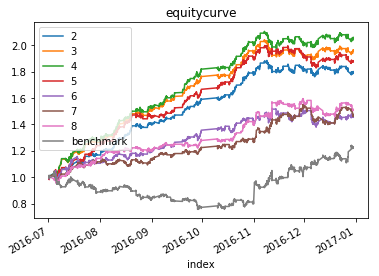

In [10]:
start = '20160601'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test2 = MajorSeriesTest(df_bu_test, OUTPUT_DIR,slm)
test2.build( max_order, offset, start, end, tcas)

test2.run()

test2.plot()
test2.results[0]['benchmark'].plot()
plt.legend()
test2.performance

### 0.05% Threshold

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.303799,0.003282,-0.003680,0.002200,0.000080,-0.040180,0.026412,-0.096736,0.597665,2.701154,2430,1.193664,0.383951
1,0.299094,0.003155,-0.003986,0.002154,0.000104,-0.037608,0.026412,-0.119880,0.540345,2.636944,1789,1.186132,0.570710
2,0.308003,0.003882,-0.004025,0.002165,0.000139,-0.037608,0.026412,-0.103228,0.537917,3.150814,1643,1.229029,0.632380
3,0.320843,0.003522,-0.004218,0.002222,0.000120,-0.037608,0.026412,-0.128472,0.526818,2.744516,1728,1.207812,0.545139
4,0.354156,0.001580,-0.003497,0.002453,0.000047,-0.047068,0.026412,-0.126464,0.701540,1.115659,1967,1.093248,0.417895
5,0.362576,0.004264,-0.003160,0.002668,0.000115,-0.023376,0.026763,-0.114588,0.844399,2.939895,2183,1.251561,0.363262
6,0.389748,0.003866,-0.002846,0.002708,0.000097,-0.024286,0.046855,-0.103596,0.951651,2.479652,2359,1.228080,0.305638


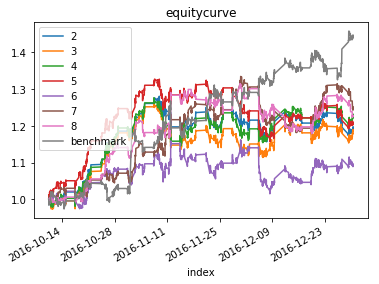

In [11]:
start = '20161001'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test7 = MajorSeriesTest(df_bu_test_th, OUTPUT_DIR,slm_th_0)
test7.build( max_order, offset, start, end, tcas)

test7.run()

test7.plot()
test7.results[0]['benchmark'].plot()
plt.legend()
test7.performance

## 0.1% threshold in price movements

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.303799,0.003282,-0.003680,0.002200,0.000080,-0.040180,0.026412,-0.096736,0.597665,2.701154,2430,1.193664,0.383951
1,0.299094,0.003155,-0.003986,0.002154,0.000104,-0.037608,0.026412,-0.119880,0.540345,2.636944,1789,1.186132,0.570710
2,0.311453,0.001503,-0.004368,0.002203,0.000048,-0.037608,0.026412,-0.199355,0.504348,1.206591,1840,1.088688,0.475543
3,0.311303,0.003423,-0.004076,0.002273,0.000099,-0.037608,0.026412,-0.109268,0.557777,2.748976,2038,1.201960,0.416585
4,0.344028,0.002292,-0.003584,0.002407,0.000064,-0.047068,0.026412,-0.145283,0.671798,1.665557,2097,1.135228,0.378159
5,0.317036,0.002283,-0.003288,0.002473,0.000059,-0.029157,0.026763,-0.152669,0.752248,1.800559,2282,1.134719,0.336109
6,0.315078,0.000424,-0.002889,0.002584,0.000011,-0.022828,0.039788,-0.156787,0.894226,0.336511,2354,1.025022,0.282498


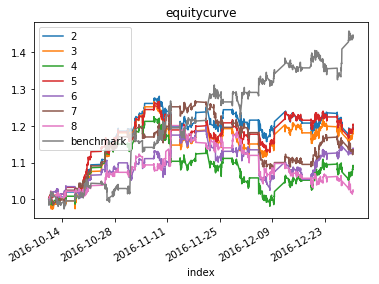

In [12]:
from Backtesting.Vectorized.models import OneContractTest

start = '20161001'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test3 = MajorSeriesTest(df_bu_test_th, OUTPUT_DIR,slm_th)
test3.build( max_order, offset, start, end, tcas)

test3.run()

test3.plot()
test3.results[0]['benchmark'].plot()
plt.legend()
test3.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.262314,0.006478,-0.003198,0.002000,0.000154,-0.040180,0.026412,-0.065766,0.625451,6.173434,5157,1.796735,0.368043
1,0.278342,0.007818,-0.003411,0.001976,0.000255,-0.037608,0.026412,-0.074338,0.579308,7.021549,3775,1.961560,0.567417
2,0.282382,0.006419,-0.003720,0.002033,0.000201,-0.037608,0.026412,-0.126808,0.546465,5.682990,3931,1.789548,0.469346
3,0.284026,0.006782,-0.003522,0.002081,0.000194,-0.037608,0.026412,-0.072876,0.591069,5.969458,4309,1.834178,0.413785
4,0.306164,0.004380,-0.003166,0.002180,0.000122,-0.047068,0.026412,-0.108681,0.688526,3.576610,4432,1.538754,0.370036
5,0.279136,0.002291,-0.002818,0.002269,0.000060,-0.031024,0.026763,-0.136802,0.805048,2.051481,4703,1.281740,0.318520
6,0.260817,0.002106,-0.002588,0.002333,0.000053,-0.022828,0.039788,-0.131249,0.901729,2.018437,4912,1.259010,0.281555


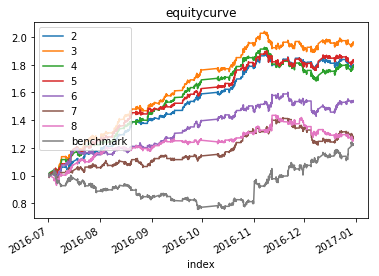

In [13]:
start = '20160601'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test4 = MajorSeriesTest(df_bu_test_th, OUTPUT_DIR,slm_th)
test4.build( max_order, offset, start, end, tcas)

test4.run()

test4.plot()
test4.results[0]['benchmark'].plot()
plt.legend()
test4.performance

## 0.2% threshold in price movements

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
1,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
2,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
3,0.113505,0.000260,-0.003173,0.002202,0.000028,-0.023311,0.008757,-0.073199,0.693901,0.573341,551,1.015358,0.255898
4,0.136105,0.000761,-0.002707,0.002417,0.000037,-0.011665,0.024606,-0.072304,0.892893,1.397379,1202,1.044885,0.236273
5,0.166971,-0.001900,-0.002829,0.002390,-0.000077,-0.015451,0.024606,-0.146498,0.845123,-2.844745,1454,0.887902,0.215956
6,0.124336,-0.002244,-0.002546,0.002127,-0.000115,-0.014926,0.012832,-0.139815,0.835321,-4.511930,1155,0.867606,0.215584


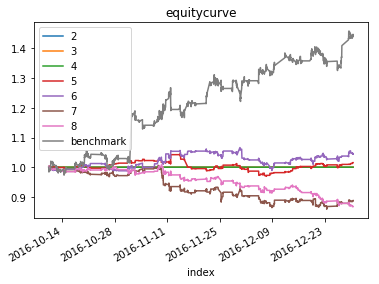

In [14]:
from Backtesting.Vectorized.models import OneContractTest

start = '20161001'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test5 = MajorSeriesTest(df_bu_test_th_2, OUTPUT_DIR,slm_th_2)
test5.build( max_order, offset, start, end, tcas)

test5.run()

test5.plot()
test5.results[0]['benchmark'].plot()
plt.legend()
test5.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
1,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
2,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
3,0.102267,0.000734,-0.002747,0.002156,0.000087,-0.023311,0.011488,-0.068306,0.784921,1.794424,1037,1.090287,0.251688
4,0.136499,0.000426,-0.002541,0.002236,0.000023,-0.016839,0.024606,-0.095746,0.879932,0.781095,2301,1.052457,0.232942
5,0.152775,-0.000284,-0.002527,0.002274,-0.000012,-0.015451,0.024606,-0.136058,0.899825,-0.464302,2861,0.965101,0.219154
6,0.116406,-0.001176,-0.002288,0.002075,-0.000062,-0.014926,0.013563,-0.161108,0.906501,-2.526343,2319,0.855312,0.203967


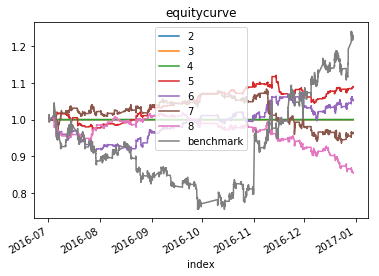

In [15]:
start = '20160601'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test6 = MajorSeriesTest(df_bu_test_th_2, OUTPUT_DIR,slm_th_2)
test6.build( max_order, offset, start, end, tcas)

test6.run()

test6.plot()
test6.results[0]['benchmark'].plot()
plt.legend()
test6.performance